# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

df = pd.read_csv('G:\Downloads\df_tratado.csv')

# Separar variáveis explicativas da variável resposta (mau)
y = df['mau']
X = df.drop('mau', axis=1)

# Separar a base em treinamento 70% - 30%
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=100)

# Verificar as dimensões das bases
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(11655, 28) (4995, 28) (11655,) (4995,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

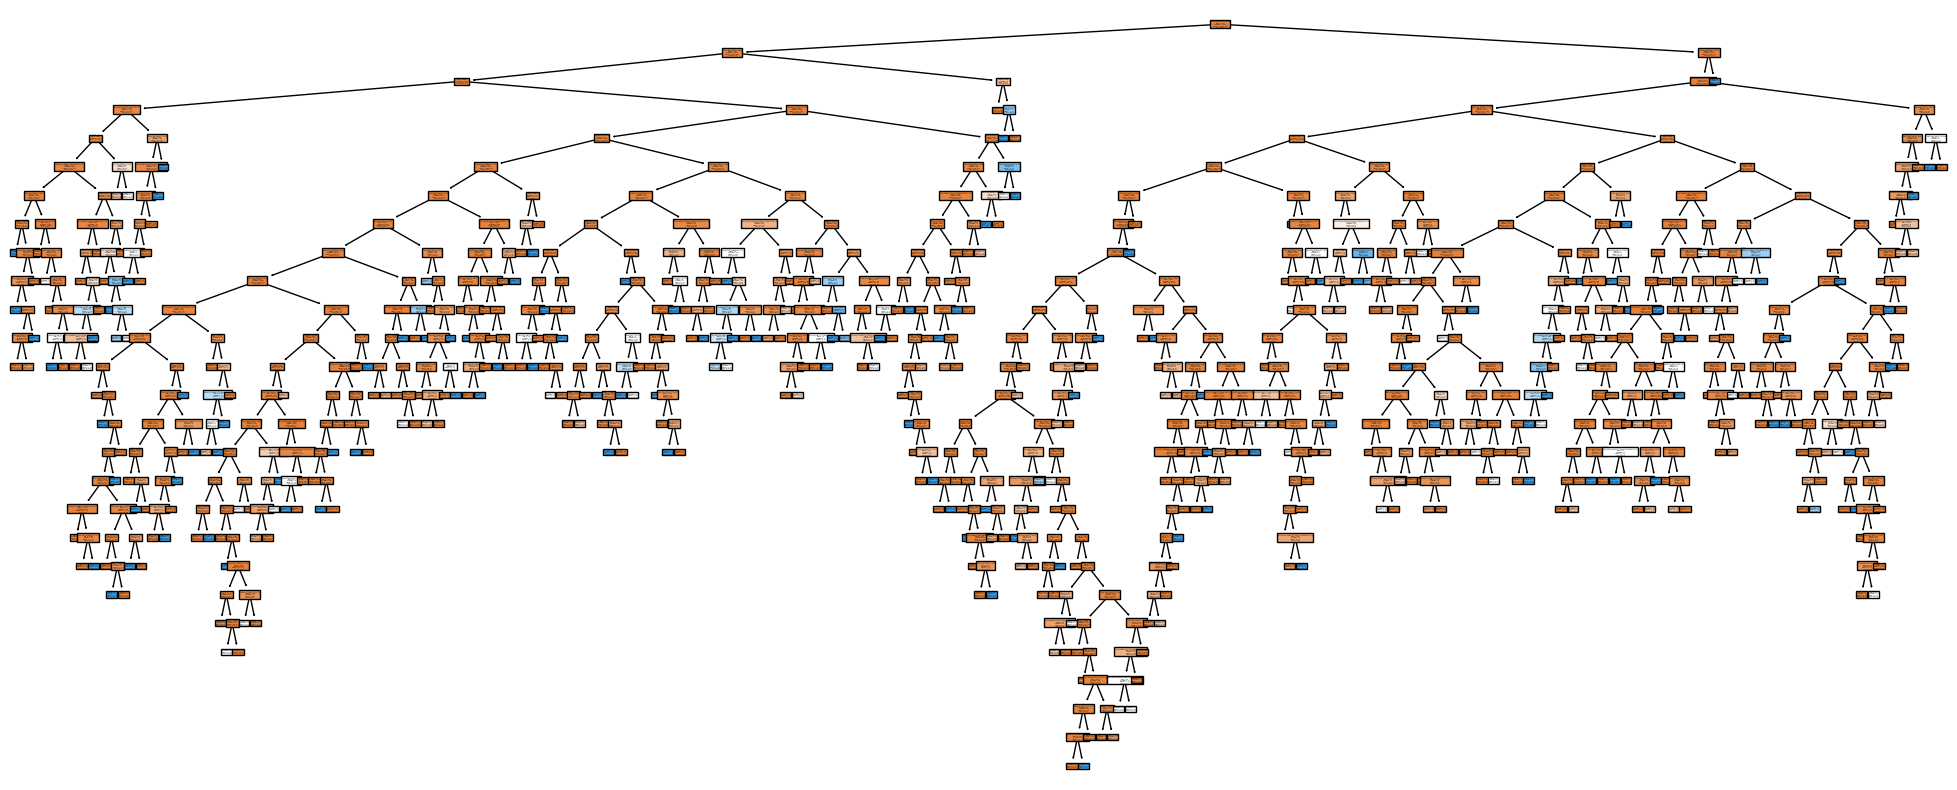

Acurácia na base de treinamento: 0.99


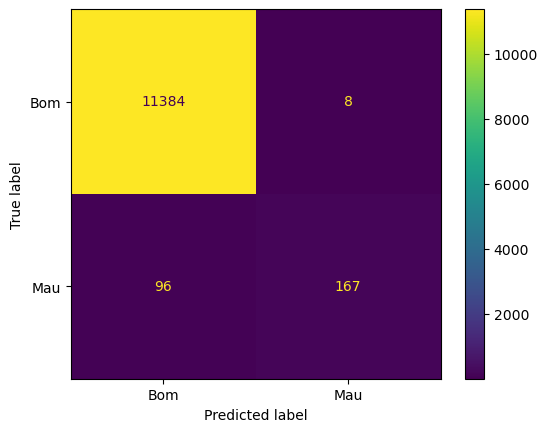

In [33]:
#1) Definindo o objeto da árvore de decisão:
arvore_decisao = DecisionTreeClassifier(random_state=100)

# 2) Treinando o modelo:
arvore_decisao.fit(X_treino, y_treino)

# 3) Visualizando a árvore de decisão:
plt.figure(figsize=(25, 10))
plot_tree(arvore_decisao,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=list(X_treino.columns))
plt.show()

# 4) Produzindo a matriz de confusão para a base:
previsoes_treino = arvore_decisao.predict(X_treino)
cm_treino = confusion_matrix(y_treino, previsoes_treino, labels=arvore_decisao.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_treino, display_labels=['Bom', 'Mau']).plot()

# 5) Calculando a acurácia da base:
acuracia_treino = accuracy_score(y_treino, previsoes_treino)
print(f'Acurácia na base de treinamento: {acuracia_treino:.2f}')

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

Acurácia na base de teste: 0.97
Acurácia na base de treinamento: 0.99
Acurácia na base de teste: 0.97
Acurácia na base de teste (árvore ajustada): 0.97
Proporção de clientes classificados como "maus": 0.01
Acurácia se todos fossem classificados como "bons": 0.97


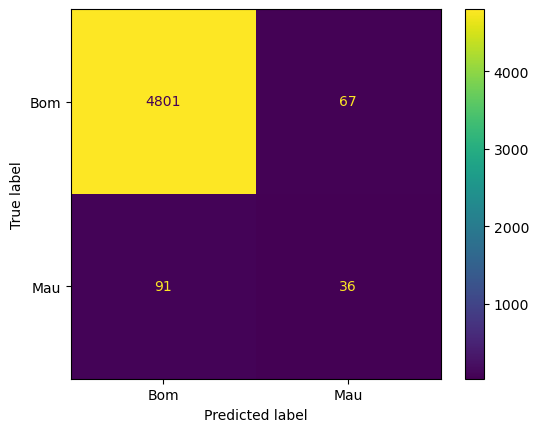

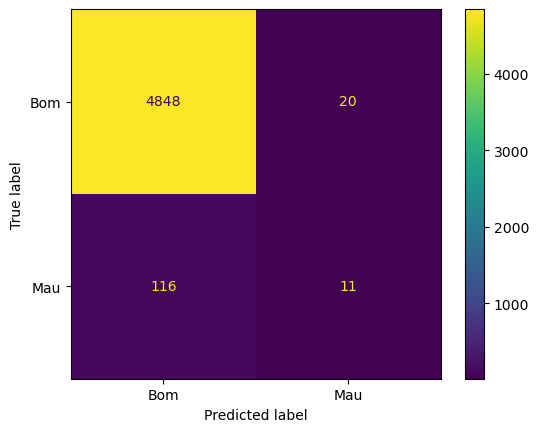

In [39]:
# 1) Classificando a base de teste
previsoes_teste = arvore_decisao.predict(X_teste)

# 2) Produzindo a matriz de confusão para a base de teste
cm_teste = confusion_matrix(y_teste, previsoes_teste, labels=arvore_decisao.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_teste, display_labels=['Bom', 'Mau']).plot()

# 3) Calculando a acurácia na base de teste
acuracia_teste = accuracy_score(y_teste, previsoes_teste)
print(f'Acurácia na base de teste: {acuracia_teste:.2f}')

# 3) Comparando com a acurácia na base de treinamento
print(f'Acurácia na base de treinamento: {acuracia_treino:.2f}')
print(f'Acurácia na base de teste: {acuracia_teste:.2f}')

# 4) Treinando uma nova árvore com parâmetros ajustados
arvore_decisao_ajustada = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
arvore_decisao_ajustada.fit(X_treino, y_treino)

# 4) Produzindo a matriz de confusão para a nova árvore na base de teste
previsoes_teste_ajustada = arvore_decisao_ajustada.predict(X_teste)
cm_teste_ajustada = confusion_matrix(y_teste, previsoes_teste_ajustada, labels=arvore_decisao_ajustada.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_teste_ajustada, display_labels=['Bom', 'Mau']).plot()

# 4) Calculando a acurácia na base de teste para a nova árvore
acuracia_teste_ajustada = accuracy_score(y_teste, previsoes_teste_ajustada)
print(f'Acurácia na base de teste (árvore ajustada): {acuracia_teste_ajustada:.2f}')

# 4) Proporção de clientes classificados como 'maus'
proporcao_maus = (previsoes_teste_ajustada == 1).mean()
print(f'Proporção de clientes classificados como "maus": {proporcao_maus:.2f}')

# 5) Acurácia se todos os contratos fossem classificados como 'bons'
acuracia_todos_bons = (y_teste == 0).mean()
print(f'Acurácia se todos fossem classificados como "bons": {acuracia_todos_bons:.2f}')
